In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
shubham47_salary_data_dataset_for_linear_regression_path = kagglehub.dataset_download('shubham47/salary-data-dataset-for-linear-regression')

print('Data source import complete.')


**Linear Regression with Sci-kit Learn Model and Hard-core Formula**

1. Regression analysis is one of the most widely used methods for prediction.

* Here I am explaining the linear regression algorithm with Root Formula.  

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-data-dataset-for-linear-regression/Salary_Data.csv


1. Linear regression is a **linear model**, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y).

2. More specifically, that y can be calculated from a linear combination of the input variables (x).

3. When there is a **single input variable (x)**, the method is referred to as simple linear regression and When more than **one input variable** multiple input variables.

4. Different techniques can be used to prepare or train the linear regression equation from data, the most common of which is called **Ordinary Least Squares**. It is common to therefore refer to a model prepared this way as Ordinary Least Squares Linear Regression or just Least Squares Regression.

**Linear Regression Equation:-**

>                                 y = Mx + C

1. The linear equation assigns one scale factor to each input value or column, called a coefficient and represented by the capital Greek letter Beta (B). Here I used "M" instead of Beta.

2. One additional coefficient is also added, giving the line an additional degree of freedom (e.g. moving up and down on a two-dimensional plot) and is often called the intercept or the bias coefficient. "C" is the intercept in the above equation.

3. In higher dimensions when we have more than one input (x), the line is called a plane or a hyper-plane.

**Types**

*    There are many more techniques because the model is so well studied.

**1. Simple Linear Regression**

With simple linear regression when we have a single input, we can use statistics to estimate the coefficients.

This requires that you calculate statistical properties from the data such as means, standard deviations, correlations and covariance. All of the data must be available to traverse and calculate statistics.


**2. Ordinary Least Squares**

When we have more than one input we can use Ordinary Least Squares to estimate the values of the coefficients.

The Ordinary Least Squares procedure seeks to minimize the sum of the squared residuals. This means that given a regression line through the data we calculate the distance from each data point to the regression line, square it, and sum all of the squared errors together.

This approach treats the data as a matrix and uses linear algebra operations to estimate the optimal values for the coefficients. It means that all of the data must be available and you must have enough memory to fit the data and perform matrix operations.

**3. Gradient Descent**

When there are one or more inputs you can use a process of optimizing the values of the coefficients by iteratively minimizing the error of the model on your training data.

This operation is called Gradient Descent and works by starting with random values for each coefficient. The sum of the squared errors are calculated for each pair of input and output values. A learning rate is used as a scale factor and the coefficients are updated in the direction towards minimizing the error. The process is repeated until a minimum sum squared error is achieved or no further improvement is possible.

When using this method, you must select a learning rate (alpha) parameter that determines the size of the improvement step to take on each iteration of the procedure

**4. Regularization**

There are extensions of the training of the linear model called regularization methods.

These seek to both minimize the sum of the squared error of the model on the training data (using ordinary least squares) but also to reduce the complexity of the model (like the number or absolute size of the sum of all coefficients in the model).

*  Two popular examples of regularization procedures for linear regression are:

**Lasso Regression:**
        where Ordinary Least Squares is modified to also minimize the absolute sum of the coefficients (called L1 regularization).
        
        
**Ridge Regression:**
        where Ordinary Least Squares is modified to also minimize the squared absolute sum of the coefficients (called L2 regularization).
These methods are effective to use when there is collinearity in your input values and ordinary least squares would overfit the training data.

1. Indenpendent variable(X=YearsExperience) and Dependent variable(y=Salary)

In [ ]:
#import required library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# read the dataset

salary_dataset_path = "../input/salary-data-dataset-for-linear-regression/Salary_Data.csv"

df = pd.read_csv(salary_dataset_path)

**EDA**

In [ ]:
# Showing First 5 rows of the Dataset

df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
# Showing Last 5 rows of the Dataset

df.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [ ]:
#check number of rows and number of columns
df.shape     #30 rows and 2 columns

(30, 2)

In [ ]:
#check dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


* Here total 30 examples with no any missing values.

* one columns is float and another is intger.

In [ ]:
#Show summary statistics of the data

df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
#check any missing values

df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

The dataset has no missing value

In [ ]:
#any outliers

df.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

In [ ]:
df.kurt()

YearsExperience   -1.012212
Salary            -1.295421
dtype: float64

* All values are approx. same

In [ ]:
#check any correlation and covariance

df[['YearsExperience','Salary']].cov()

,YearsExperience,Salary
YearsExperience,8.053609,7.610630e+04
Salary,76106.303448,7.515510e+08


In [ ]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


* In this dataset, "YearsExperience" is the independent variable (x) and "Salary" is the dependent variable (y)

**Visualization**

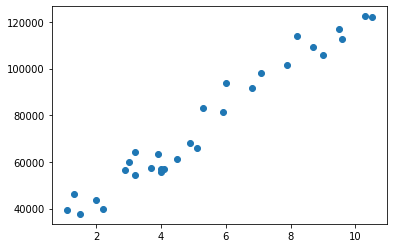

In [ ]:
plt.scatter(df['YearsExperience'],df['Salary'])

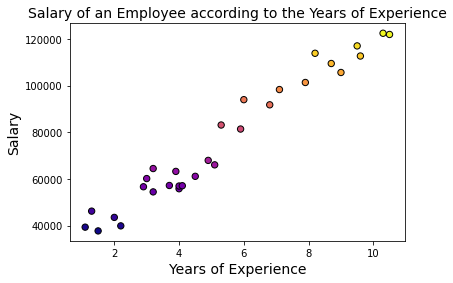

In [ ]:
plt.figure(figsize=(6,4))

plt.xlabel("Years of Experience", loc='center',fontsize=14,weight=20)
plt.ylabel("Salary", loc='center',fontsize=14,weight=20)
plt.title("Salary of an Employee according to the Years of Experience", loc='center',fontsize=14,weight=30)

plt.scatter(df['YearsExperience'],df['Salary'],
            s = 40,
            c = df['Salary'],
            cmap= 'plasma',
            alpha= 1,
            edgecolors='k'
            )

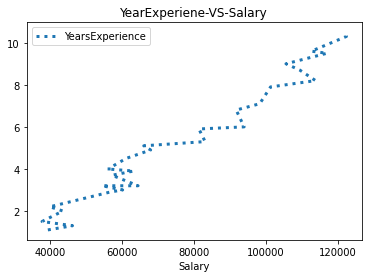

In [ ]:

df = pd.DataFrame(data=df)

df.plot.line(x='Salary',linestyle = ':', linewidth='3')

plt.title('YearExperiene-VS-Salary')
plt.show()

1. * Here, clearly shows that linearly relationship between dependent and independent variable.

**Separeting Independent and Dependent Variables**

In [ ]:
X = df.drop('Salary',axis=1)

In [ ]:
Y = df.Salary

In [ ]:
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [ ]:
Y.head()

0    39343
1    46205
2    37731
3    43525
4    39891
Name: Salary, dtype: int64

**Implementing Linear Regression using Math Formula**

In [ ]:
x = df["YearsExperience"]
y = df["Salary"]

dev_x = x - np.mean(x)
dev_y = y - np.mean(y)

# Coefficient
m = np.sum(dev_x * dev_y) / np.sum(dev_x**2)

#Intercept
c = np.mean(y) - (m * np.mean(x))

In [ ]:
m

9449.962321455077

In [ ]:
c

25792.20019866869

In [ ]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


Predict Salary of an Employee according to his Years of Experience

Use this mathematical equation: y = m*x + c

In [ ]:
# y = m*x + c
# x = 1.1 & y = 39343

y1 = (m * 1.1) + c
print(y1)

36187.15875226927


In [ ]:
# x = 1.3 & y = 46205

y2 = (m * 1.3) + c
print(y2)

38077.15121656029


**Implementing Linear Regression using Scikit Learn Model**

In [ ]:
lr = LinearRegression()

lr.fit(df[["YearsExperience"]],df["Salary"])

LinearRegression()

In [ ]:
# m = 9449.962321455077
lr.coef_

array([9449.96232146])

Coefficient of the dataset using math formula and model are same.

In [ ]:
# c = 25792.20019866869
lr.intercept_

25792.200198668696

Intercept of the dataset using math formula and model are same.

In [ ]:
df2 = df.copy()

In [ ]:
df2['Predicted Salary'] = reg.predict(df[['YearsExperience']])

In [ ]:
df2.head()

,YearsExperience,Salary,Predicted Salary
0,1.1,39343,36381.645925
1,1.3,46205,38253.018524
2,1.5,37731,40124.391123
3,2.0,43525,44802.822619
4,2.2,39891,46674.195218


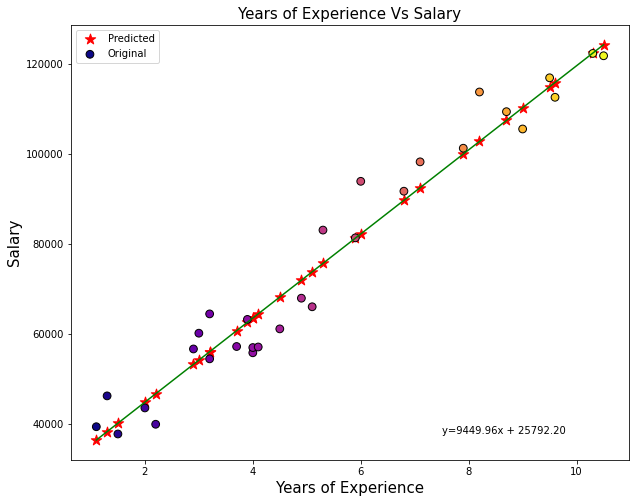

In [ ]:
from matplotlib.lines import lineStyles
plt.figure(figsize=(10,8))

equ = f"y={float(m):.2f}x + {float(c):.2f}"

plt.text(max(df['YearsExperience'])-3, min(df['Salary'])+30, equ)

plt.scatter(df2['YearsExperience'],df2['Predicted Salary'],color='red',marker='*',s = 120, alpha=1, label='Predicted')

plt.plot(df['YearsExperience'],df2['Predicted Salary'],color = 'green')

plt.title('Years of Experience Vs Salary', fontsize=15, weight=30)
plt.xlabel('Years of Experience', loc='center', fontsize=15, weight=20)
plt.ylabel('Salary', loc='center', fontsize=15, weight=20)

plt.scatter(
    df['YearsExperience'], df['Salary'],
    s = 60,
    c = df['YearsExperience'],
    cmap='plasma',
    alpha = 1,
    edgecolors='k',
    label='Original'
)

plt.legend()
plt.show()

**Linear Regression Model Implementation and Evaluation by splitting Dataset**

**Splitting the data**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=10,test_size=0.20)

In [ ]:
x_train.shape

(24, 1)

In [ ]:
x_test.shape

(6, 1)

**Model Fitting**

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
# Intercept c

reg.intercept_

26089.09663241673

In [ ]:
# Coefficient m
reg.coef_

array([9356.86299354])

**Prediction**

In [ ]:
y_pred = reg.predict(x_test)

In [ ]:
y_pred

array([89715.76498848, 56031.05821174, 53223.99931368, 40124.39112273,
       44802.8226195 , 92522.82388655])

In [ ]:
y_test

20    91738
7     54445
5     56642
2     37731
3     43525
21    98273
Name: Salary, dtype: int64

**Evaluation**

In [ ]:
mean_absolute_error(y_test,y_pred)

2741.2806275420844

In [ ]:
mean_squared_error(y_test,y_pred)

9785570.138914324

In [ ]:
# Model Train Accuracy Score
reg.score(x_train,y_train)*100

94.94673013344645

In [ ]:
# Model Test Accuracy Score
reg.score(x_test,y_test) * 100

98.16423482070253